In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.colors import LogNorm

In [2]:
run_on_colab = True

try:
  import google.colab
except ModuleNotFoundError as e:
  run_on_colab =False

print(f'run_on_colab: {run_on_colab}')


run_on_colab: False


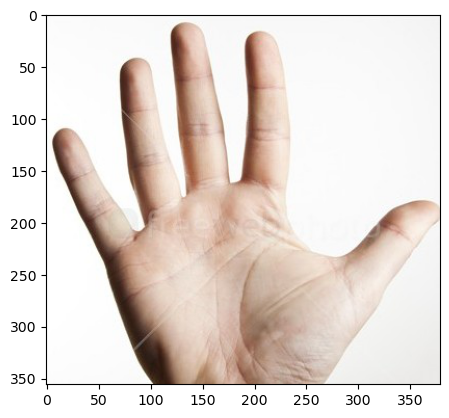

In [3]:
import requests

url = 'https://raw.githubusercontent.com/dsaint31x/OpenCV_Python_Tutorial/master/DIP/img/hand.jpg'
image_ndarray = np.asarray(bytearray(requests.get(url).content), dtype=np.uint8)
img = cv2.imdecode(image_ndarray, cv2.IMREAD_COLOR)
plt.imshow(img[...,::-1])

In [4]:
def segmented_img(mask, img, win_title='result'):
            
    ret = cv2.bitwise_and(img, img, mask=mask)
    # mask = cv2.merge((mask,mask,mask))
    # ret = cv2.bitwise_and(img, mask)
    if run_on_colab:
      plt.figure()
      plt.title(win_title)
      plt.imshow(ret[:,:,::-1])
    else:
      cv2.imshow(win_title, ret)

    return ret
      

In [5]:
def extract_roi_based_backproj(roi_hs_hist,img, img_hsv):
  bp = cv2.calcBackProject([img_hsv], 
                          [0,1],          # channels.
                          roi_hs_hist,    # hist
                          [0,180, 0,256], # ranges
                          1               # scale
                          )
  #--------------------
  # bp display
  plt.figure()
  plt.title('back projected ratio (log scale)')
  plt.imshow(bp.astype(float), cmap='hot',norm=LogNorm())
  plt.colorbar()

  # bp is percentage. : 0~100
  print(f'the range of bf : {np.min(bp)} ~ {np.max(bp)}')

  #===============================================

  # get smoothed mask
  # disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
  disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
  bp_filtered = cv2.filter2D(bp, -1, disc)
  print(bp_filtered.dtype)
  # th, mask = cv2.threshold(bp_filtered,0,255,cv2.THRESH_BINARY)
  th, mask = cv2.threshold(bp_filtered,1,255,cv2.THRESH_BINARY)
  print(f'threshold:{th}')
  print(mask.dtype)
  print(mask.shape)
  print(np.unique(mask ,return_counts = True))
  
  return segmented_img(mask, img, 'segmented img')

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
the range of bf : 0 ~ 93
uint8
threshold:1.0
uint8
(356, 379)
(array([  0, 255], dtype=uint8), array([77877, 57047]))


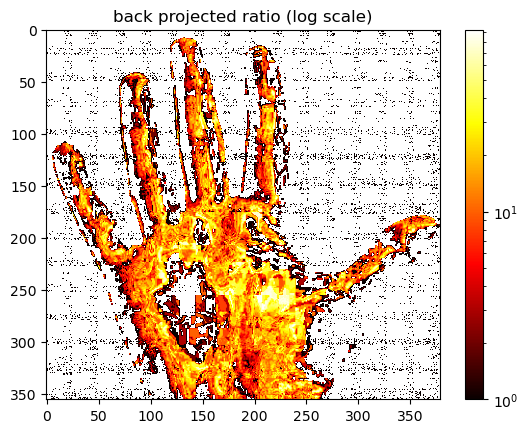

In [6]:
if run_on_colab:
  (x,y,w,h) = (190,250,80,80)
else:
  (x,y,w,h) = cv2.selectROI('select ROI', img, True)

draw    = img.copy()
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

if w>0 and h>0:
    roi = draw[y:y+h, x:x+h]
    cv2.rectangle(draw, (x,y), (x+w,y+h), (255,0,0), 2)
    
    roi_hsv  = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
    roi_hs_hist = cv2.calcHist([roi_hsv], [0,1], None, [180,256], [0,180, 0,256])
    
    extract_roi_based_backproj(roi_hs_hist, img, img_hsv)


if not run_on_colab:
  cv2.imshow('source', draw)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
else:
  plt.figure()
  plt.title('source and roi')
  plt.imshow(draw[...,::-1])

# Appendix

In [197]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

#roi is the object or region of object we need to find
#target is the image we search in


# Find the histograms using calcHist. Can be done with np.histogram2d also
M = cv2.calcHist([roi_hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
I = cv2.calcHist([img_hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )

(180, 256) <class 'numpy.ndarray'>
(180, 256)


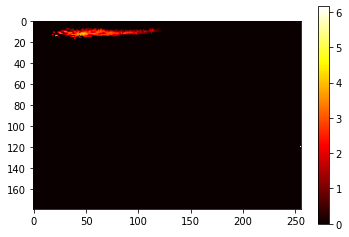

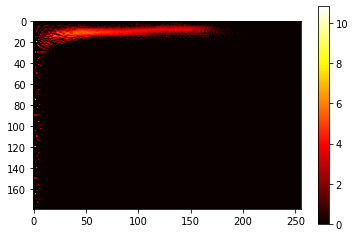

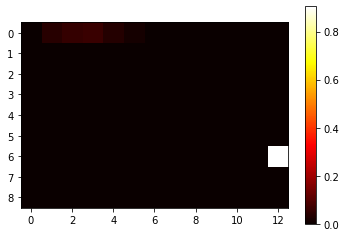

In [273]:
print(M.shape, type(M))
print(I.shape)

plt.figure()
plt.imshow(np.log1p(M), cmap='hot')
plt.colorbar()
plt.figure()
plt.imshow(np.log1p(I), cmap='hot')
plt.colorbar()
plt.figure()
plt.imshow(np.log1p(cv2.resize(M/(I+1),(0,0), fx=0.05, fy=0.05,interpolation=cv2.INTER_AREA )), cmap='hot')
plt.colorbar()

In [255]:
np.log(M/(I+1)+1).max()

6.156979

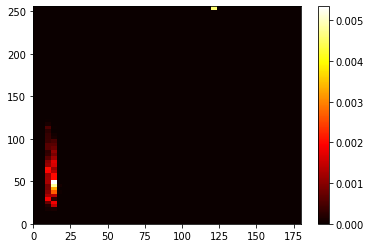

In [236]:
xedges = list(range(0,181,4))
yedges = list(range(0,257,4))
Hr, xedges, yedges = np.histogram2d(roi_hsv[...,0].ravel(), roi_hsv[...,1].ravel(), 
                                   bins=(xedges, yedges),density=True)

X, Y = np.meshgrid(xedges, yedges)
plt.figure()
plt.pcolormesh(X,Y,Hr.T, cmap='hot')
plt.colorbar()

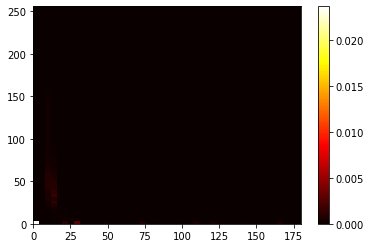

In [237]:
Ht, xedges, yedges = np.histogram2d(img_hsv[...,0].ravel(), img_hsv[...,1].ravel(), 
                                   bins=(xedges, yedges),density=True)

X, Y = np.meshgrid(xedges, yedges)
plt.figure()
plt.pcolormesh(X,Y,Ht.T, cmap='hot')
plt.colorbar()

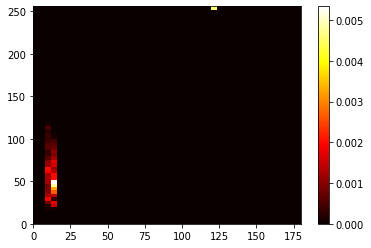

In [269]:
R = Hr/(Ht+1)
X, Y = np.meshgrid(xedges, yedges)
plt.figure()
plt.pcolormesh(X,Y,R.T, cmap='hot')
plt.colorbar()

In [210]:
[range(181)]

[range(0, 181)]